In [1]:
import m8r

In [2]:
m8r.Fetch('data','synthetic_cmp.npz',
          server='https://raw.githubusercontent.com',
          top='seg/tutorials-2017/master/1702_Step_by_step_NMO')

In [3]:
!ls

NMO.ipynb         n1                synthetic_cmp.npz
cmpt.rsf          offset.rsf


In [4]:
import numpy
data = numpy.load('synthetic_cmp.npz')

In [5]:
type(data)

numpy.lib.npyio.NpzFile

In [6]:
cmpt = m8r.Output('cmpt.rsf')
cmpt.put("d2",float(data['dt']))
cmpt.put("o2",0.0)
cmpt.put("label2","Time")
cmpt.put("unit2","s")
cmpt.put("d1",1)
cmpt.put("o1",1)
raw = data['CMP']
cmpt.put("n2",raw.shape[0])
cmpt.put("n1",raw.shape[1])
cmpt.write(raw)
cmpt.close()
    
offset = m8r.Output('offset.rsf')
off = data['offsets']
offset.put("n1",off.size)
offset.write(off)
offset.close()

In [7]:
cmp2 = m8r.transp[m8r.File('cmpt.rsf')]

In [8]:
v1, t1 = 3800, 0.22
v2, t2 = 4500, 0.46
slope = (v2-v1)/(t2-t1)

vnmo = m8r.window(n2=1).math(output="%g+(x1-%g)*%g" % (v1,t1,slope))[cmp2]

In [9]:
nmo = m8r.nmo(offset=m8r.File('offset.rsf'),
              velocity=vnmo,half=False)[cmp2]

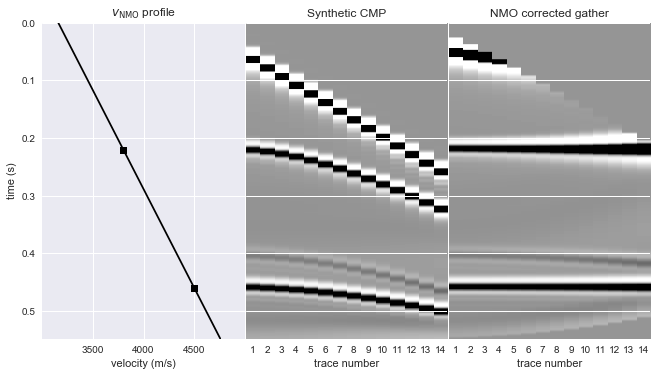

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt            # For making plots
plt.style.use(['seaborn-dark', 'seaborn-colorblind', 'seaborn-notebook'])

fig = plt.figure(figsize=(9, 5.1))

nsamples = vnmo.size()
dt = vnmo.float('d1')
noffsets = nmo.int('n2')

ax = plt.subplot(131)
ax.set_title(r'$v_\mathrm{NMO}$ profile')
ax.plot(vnmo[:], numpy.arange(nsamples)*dt, '-k')
ax.plot([v1, v2], [t1, t2], 'sk')
ax.set_xlabel('velocity (m/s)')
ax.set_ylabel('time (s)')
ax.set_xlim(3000, 5000)
ax.set_ylim(nsamples*dt, 0)
ax.grid()
ax.set_xticks(ax.get_xticks()[1:-1])

ax = plt.subplot(132)
ax.set_title('Synthetic CMP')
ax.set_xlabel('trace number')
cutoff = 0.1
aspect = 40
ax.imshow(cmp2[:].T, extent=[0.5, noffsets + 0.5, dt*nsamples, 0], 
          aspect=aspect, cmap='Greys', vmin=-cutoff, vmax=cutoff, 
          interpolation='none')
trace_numbers = list(range(1, noffsets + 1))
ax.set_xticks(trace_numbers)
ax.set_yticklabels([])
ax.grid(axis='y')

ax = plt.subplot(133)
ax.set_title('NMO corrected gather')
ax.set_xlabel('trace number')
ax.imshow(nmo[:].T, extent=[0.5, noffsets + 0.5, dt*nsamples, 0], 
          aspect=aspect, cmap='Greys', vmin=-cutoff, vmax=cutoff, 
          interpolation='none')
trace_numbers = list(range(1, noffsets + 1))
ax.set_xticks(trace_numbers)
ax.set_yticklabels([])
ax.grid(axis='y')

plt.tight_layout(pad=0.2, w_pad=0)
plt.savefig('nmo.png', dpi=600)

In [16]:
numpy.amax(vnmo)

TypeError: wantattr() takes no arguments (2 given)